# Data Visualization

Discovering as much as I can regarding the data set

In [82]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np

style.use('seaborn-poster')
sns.set_style('ticks')

df_paths = ['Data/pickles/clean_data/{}'.format(file) for file in os.listdir('Data/pickles/clean_data')]

df = pd.concat([
    pd.read_pickle(df_paths[0]),
    pd.read_pickle(df_paths[1])],
axis=1)

df.columns

Index(['accountOpenDate', 'dateOfLastAddressChange', 'cardCVV', 'enteredCVV',
       'cardLast4Digits', 'transactionType', 'echoBuffer', 'currentBalance',
       'cardPresent', 'expirationDateKeyInMatch', 'isFraud', 'creditLimit',
       'availableMoney', 'transactionDateTime', 'transactionAmount',
       'merchantName', 'acqCountry', 'merchantCountryCode', 'posEntryMode',
       'posConditionCode', 'merchantCategoryCode', 'currentExpDate'],
      dtype='object')

## Credit Limit

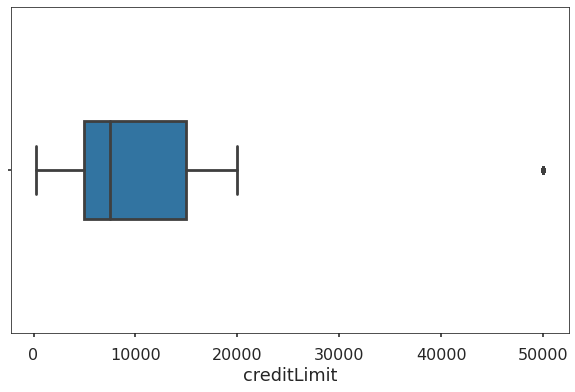

In [83]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='creditLimit', width=0.3)

The distribution seems to be slightly right skewed, but there are some really far outliers to the right. I can probably just remove that outliers around 50000 just because it is so far from Q3.

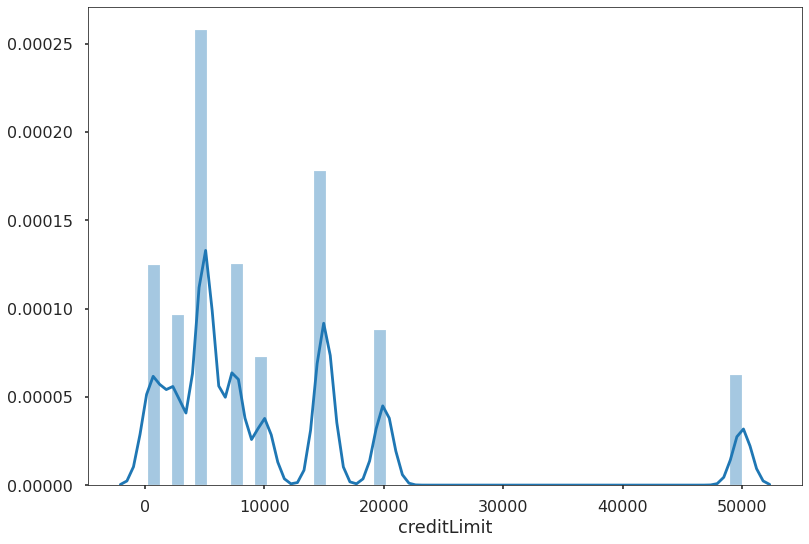

In [84]:
sns.distplot(df['creditLimit'])

The data is messier than initially expected. The distribution is multimodal and a simple transformation will not work.

Ideally if I decide to use this feature, an easy solution would be to use a model that doesn't assume gaussian.


## Available Money

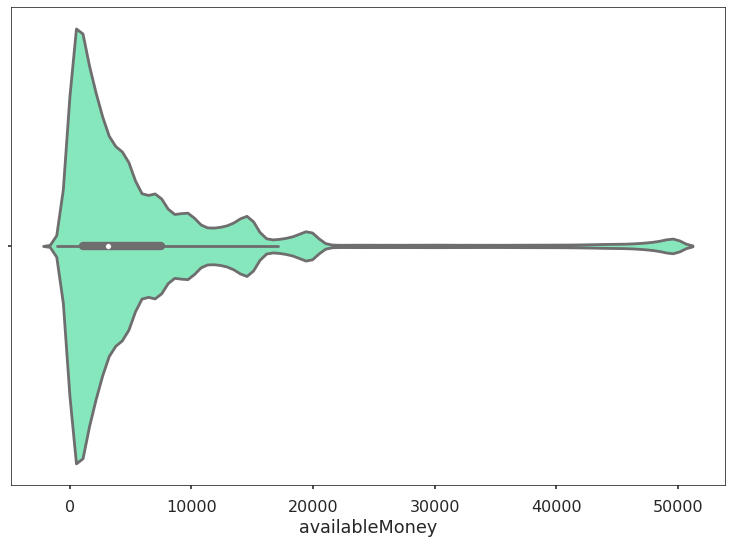

In [85]:
sns.violinplot(data=df, x='availableMoney', color='#76F7BF')

Seems to be extremely right skewed.

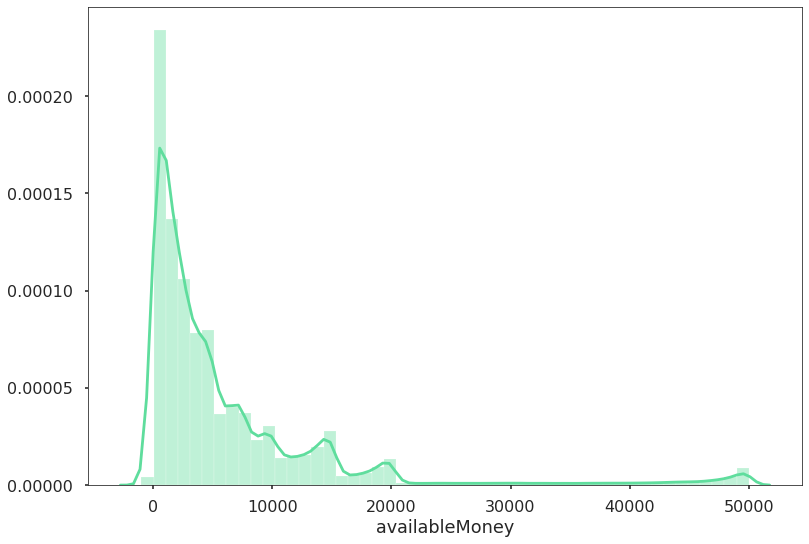

In [86]:
sns.distplot(df['availableMoney'], color='#5FDD9D')

Available Money sounds like an important feature that would probably correlate with many features within in the data set, and a simple boxcox transformation can normalize this distribution. I can also remove the outliers are 50000 as well.